
# 6th Minor Irrigation Census - Surface Lift - Uttarakhand

Dataset Description:

The UKSWLift dataset offers useful information about lift irrigation schemes in different states and districts. It provides data about scheme construction, ownership, expenditure, machinery, and operating statistics. Knowing this dataset can assist policymakers, engineers, and researchers in determining the efficiency and effectiveness of various irrigation schemes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
file_path = "UKSWLift.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset

In [3]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   state_name                                            613 non-null    object 
 1   district_name                                         613 non-null    object 
 2   block_tehsil_name                                     613 non-null    object 
 3   village_name                                          613 non-null    object 
 4   s_no_of_scheme                                        613 non-null    int64  
 5   ref_scheme_type_surface_flow_name                     0 non-null      float64
 6   ref_scheme_type_surface_lift_name                     613 non-null    object 
 7   ref_scheme_owner_name                                 613 non-null    object 
 8   total_owners_holding                          

# Display first few rows

In [4]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
    state_name district_name block_tehsil_name village_name  s_no_of_scheme  \
0  UTTARAKHAND    PITHORGARH           MUNAKOT        SALLA               1   
1  UTTARAKHAND     BAGESHWAR            KAPKOT      NAUKARI               1   
2  UTTARAKHAND    PITHORGARH           MUNAKOT        SALLA               2   
3  UTTARAKHAND     CHAMPAWAT              PATI        Ramak               7   
4  UTTARAKHAND     CHAMPAWAT              PATI   Pardhayani               3   

   ref_scheme_type_surface_flow_name ref_scheme_type_surface_lift_name  \
0                                NaN                            Others   
1                                NaN                          On-River   
2                                NaN                            Others   
3                                NaN                         On-Stream   
4                                NaN                         On-Stream   

  ref_scheme_owner_name  total_owners_holding  \
0       Panchaya

# Summary statistics

In [5]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       s_no_of_scheme  ref_scheme_type_surface_flow_name  \
count      613.000000                                0.0   
mean         3.957586                                NaN   
std          4.636615                                NaN   
min          1.000000                                NaN   
25%          1.000000                                NaN   
50%          2.000000                                NaN   
75%          5.000000                                NaN   
max         35.000000                                NaN   

       total_owners_holding  scheme_construction_cost  scheme_machinery_cost  \
count              8.000000              6.130000e+02           6.130000e+02   
mean               2.250000              4.280419e+05           1.499353e+05   
std                1.035098              1.063624e+06           6.016930e+05   
min                1.000000              0.000000e+00           0.000000e+00   
25%                1.750000           

# Check for missing values

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
state_name                                                0
district_name                                             0
block_tehsil_name                                         0
village_name                                              0
s_no_of_scheme                                            0
ref_scheme_type_surface_flow_name                       613
ref_scheme_type_surface_lift_name                         0
ref_scheme_owner_name                                     0
total_owners_holding                                    605
ref_scheme_owner_social_status_name                     605
gender_name                                             605
commissioning_period_display                              0
scheme_construction_cost                                  0
scheme_machinery_cost                                     0
scheme_maintainence_cost                                  0
finance_source_name                                     605
finance_source_name2   

# Fill missing values with median for numerical columns

In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)

# Count of unique districts

In [9]:
print("\nTotal Number of Unique Districts:", df['district_name'].nunique())


Total Number of Unique Districts: 12


# Distribution of scheme status

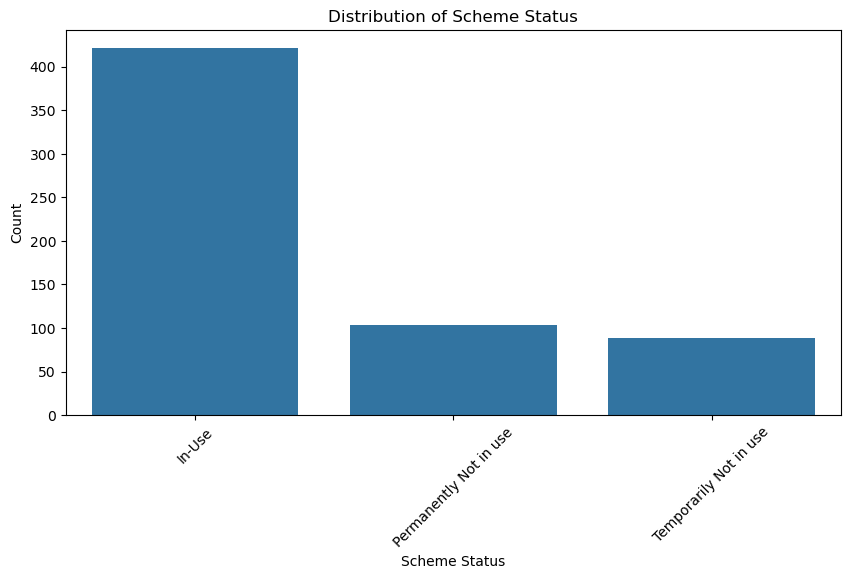

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='scheme_status_name', order=df['scheme_status_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Scheme Status")
plt.xlabel("Scheme Status")
plt.ylabel("Count")
plt.show()

# Top 5 districts with the most schemes

In [13]:
top_districts = df['district_name'].value_counts().head(5)
print("\nTop 5 Districts with the Most Schemes:")
print(top_districts)


Top 5 Districts with the Most Schemes:
district_name
NANITAL              115
PITHORGARH            96
ALMORA                79
PAURI                 75
UDHAM SINGH NAGAR     57
Name: count, dtype: int64


# Cost analysis

In [14]:
cost_columns = ['scheme_construction_cost', 'scheme_machinery_cost', 'scheme_maintainence_cost']
print("\nCost Summary:")
print(df[cost_columns].describe())


Cost Summary:
       scheme_construction_cost  scheme_machinery_cost  \
count              6.130000e+02           6.130000e+02   
mean               4.280419e+05           1.499353e+05   
std                1.063624e+06           6.016930e+05   
min                0.000000e+00           0.000000e+00   
25%                6.000000e+04           0.000000e+00   
50%                2.000000e+05           2.000000e+04   
75%                2.000000e+05           1.600000e+05   
max                1.680000e+07           7.000000e+06   

       scheme_maintainence_cost  
count                613.000000  
mean                4244.371941  
std                19772.630291  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max               200000.000000  


# Correlation matrix

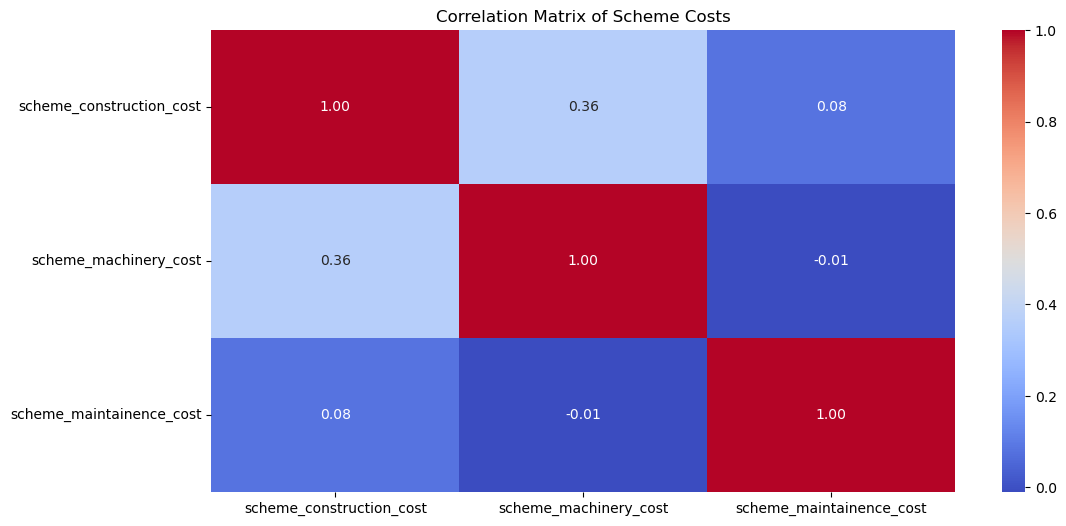

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[cost_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Scheme Costs")
plt.show()

# 1. Check for negative values in numerical columns

In [17]:
negative_values = df.select_dtypes(include=[np.number]).lt(0).sum()
print("\nNegative Values Check:")
print(negative_values[negative_values > 0])


Negative Values Check:
Series([], dtype: int64)


# 2. Check for outliers using Z-score

In [20]:
def detect_outliers(column):
    z_scores = (column - column.mean()) / column.std()
    return column[np.abs(z_scores) > 3]


print("\nOutliers in Scheme Costs:")
for col in cost_columns:
    print(f"Outliers in {col}:", detect_outliers(df[col]).count())


Outliers in Scheme Costs:
Outliers in scheme_construction_cost: 10
Outliers in scheme_machinery_cost: 7
Outliers in scheme_maintainence_cost: 18


# 3. Check for duplicate entries

In [21]:
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", duplicates.sum())



Number of Duplicate Rows: 0


# Logical checks: Verify scheme status vs. years not in use

In [24]:
invalid_status = df[(df['scheme_status_name'] == 'Functional') & (df['not_in_use_years'] > 0)]
print("\nLogical Consistency Check (Functional but Not in Use):")
print("Number of inconsistent records:", invalid_status.shape[0])


Logical Consistency Check (Functional but Not in Use):
Number of inconsistent records: 0


# Bar Plot: Scheme Status Count

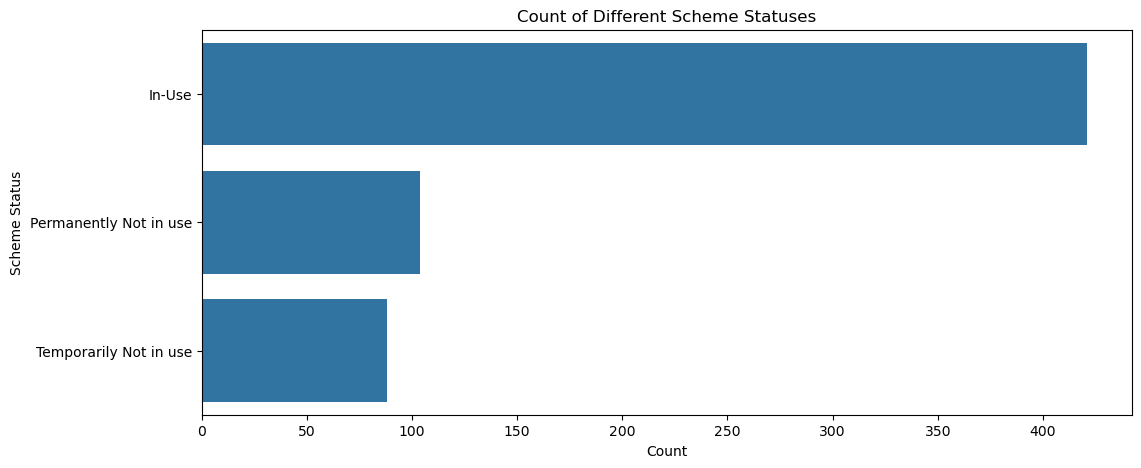

In [3]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, y="scheme_status_name", order=df["scheme_status_name"].value_counts().index)
plt.title("Count of Different Scheme Statuses")
plt.xlabel("Count")
plt.ylabel("Scheme Status")
plt.show()

# Histogram: Scheme Construction Cost

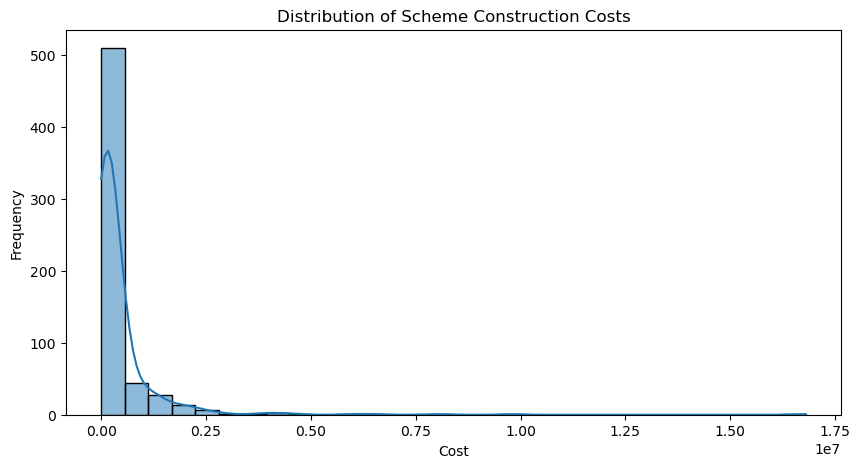

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df["scheme_construction_cost"], bins=30, kde=True)
plt.title("Distribution of Scheme Construction Costs")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

# Box Plot: Horsepower of Lifting Device

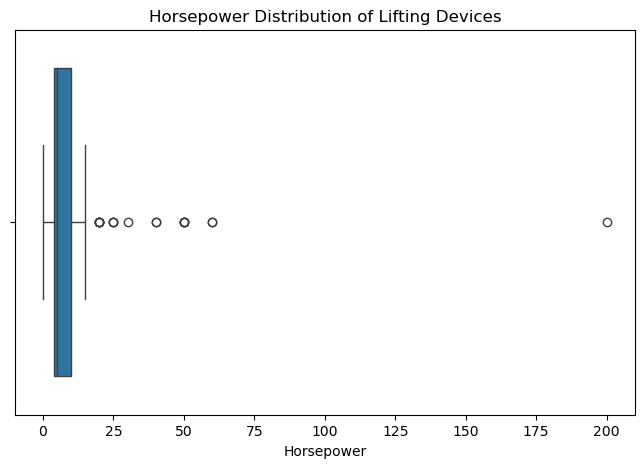

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["horse_power_of_lifting_device"].dropna())
plt.title("Horsepower Distribution of Lifting Devices")
plt.xlabel("Horsepower")
plt.show()

# Scatter Plot: Horsepower vs. Pump Operating Days in Kharif Season

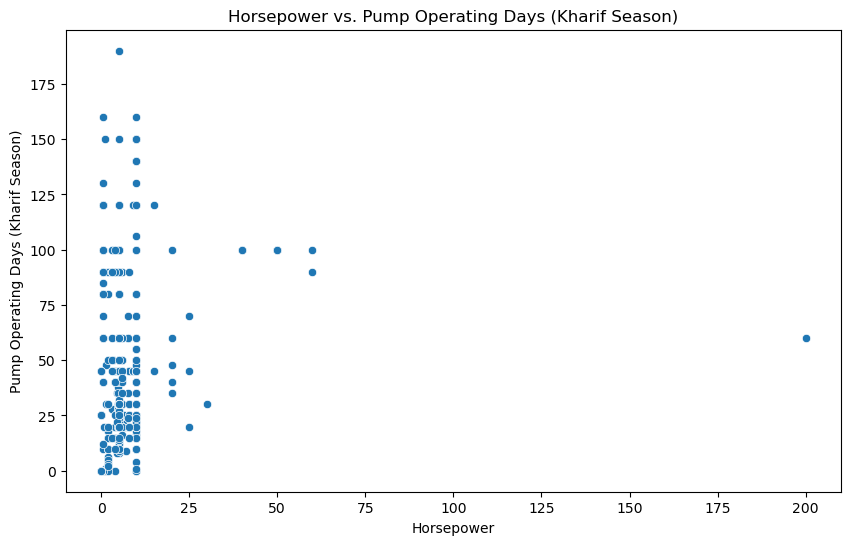

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="horse_power_of_lifting_device", y="pump_operating_days_kharif_season")
plt.title("Horsepower vs. Pump Operating Days (Kharif Season)")
plt.xlabel("Horsepower")
plt.ylabel("Pump Operating Days (Kharif Season)")
plt.show()

# Pie Chart: Distribution of Scheme Ownership

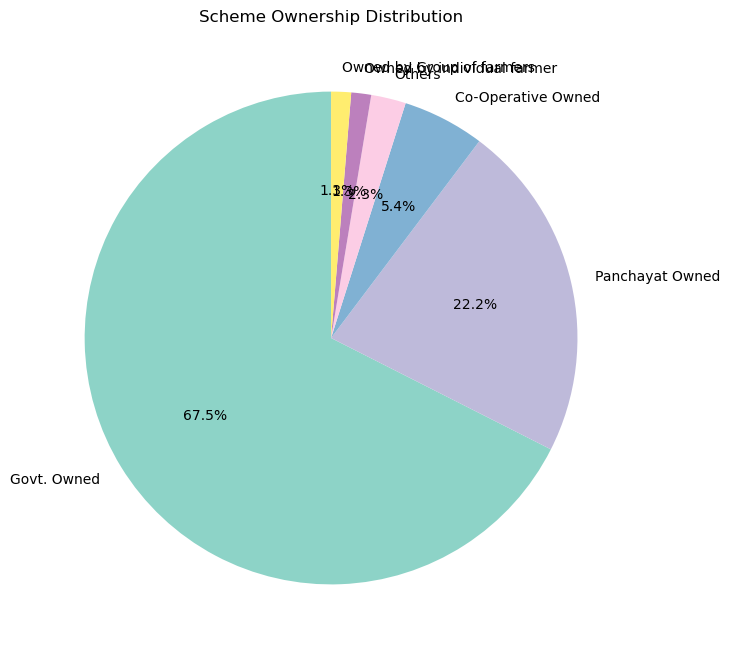

In [8]:
plt.figure(figsize=(8,8))
df["ref_scheme_owner_name"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set3")
plt.title("Scheme Ownership Distribution")
plt.ylabel("")
plt.show()

# Pairplot: Selected Numeric Features

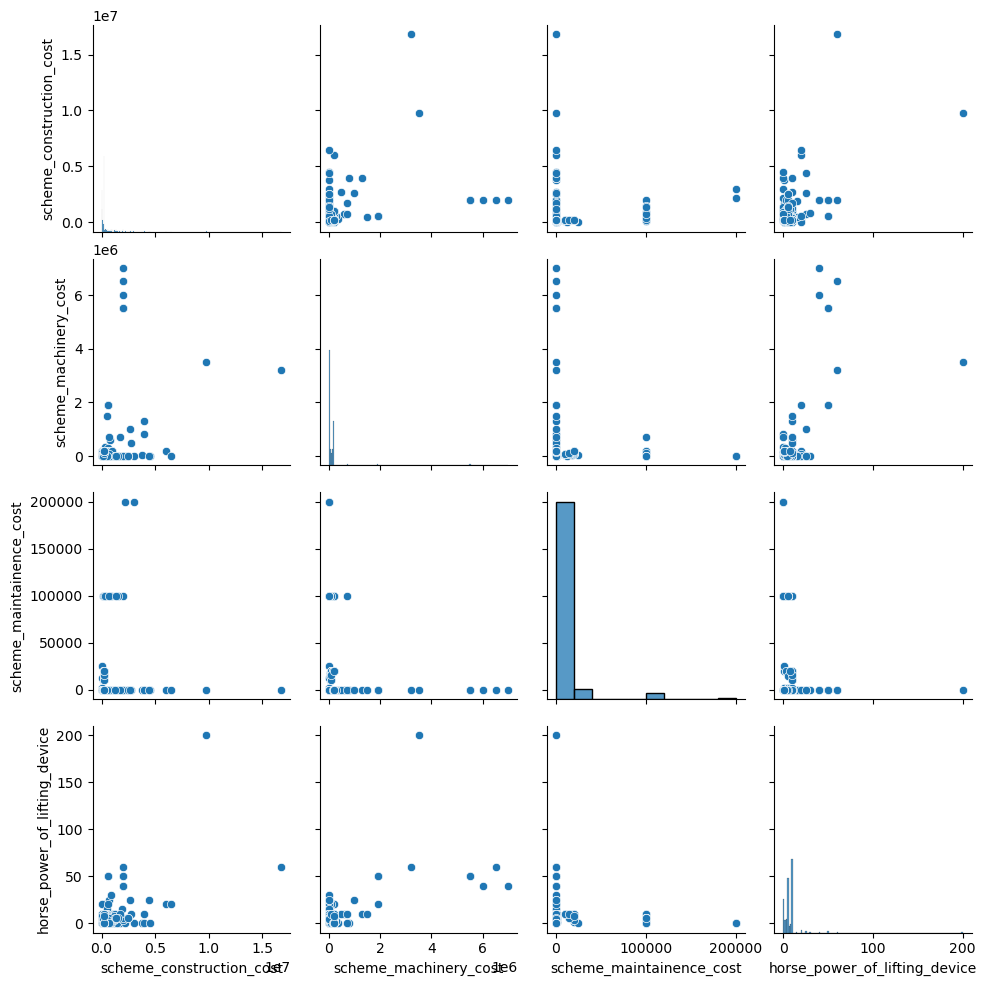

In [9]:
selected_features = ["scheme_construction_cost", "scheme_machinery_cost", "scheme_maintainence_cost", "horse_power_of_lifting_device"]
sns.pairplot(df[selected_features].dropna())
plt.show()

# Heatmap: Correlation Matrix

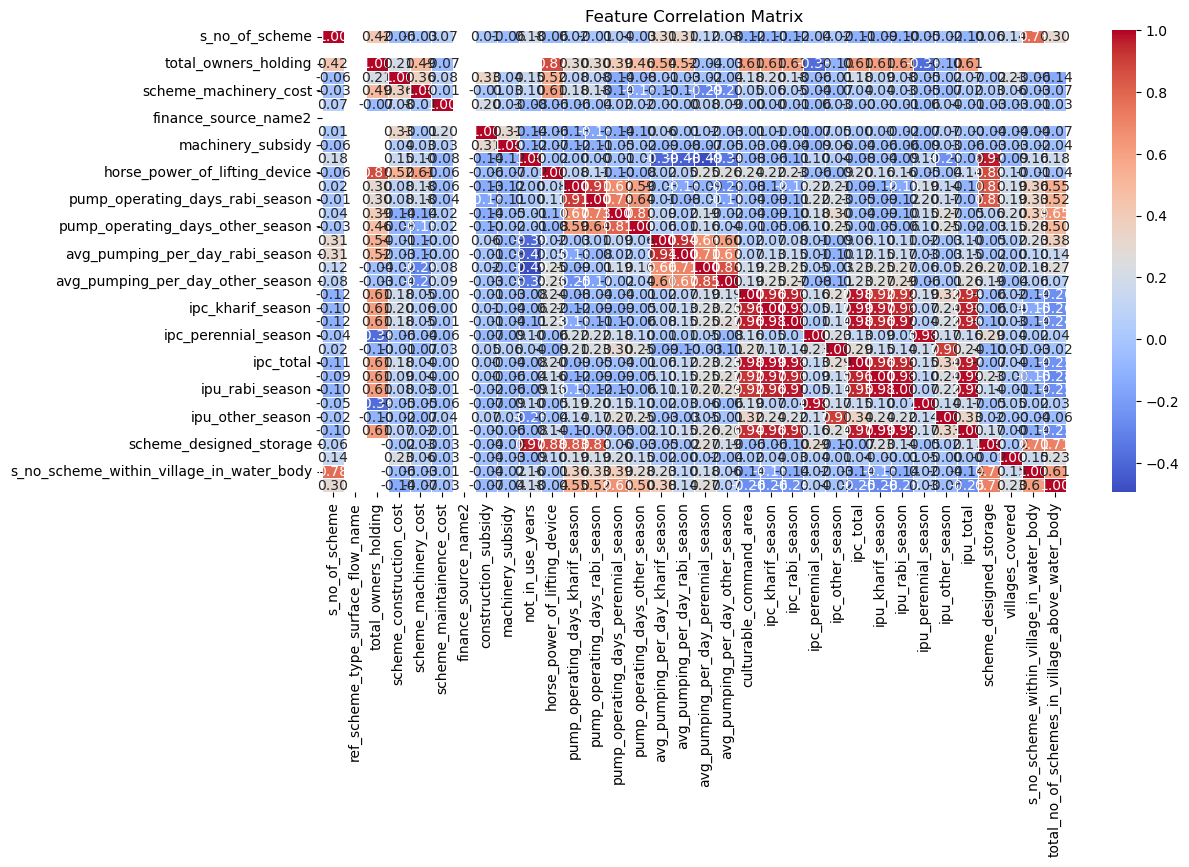

In [11]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


# Box Plot: IPC in Different Seasons

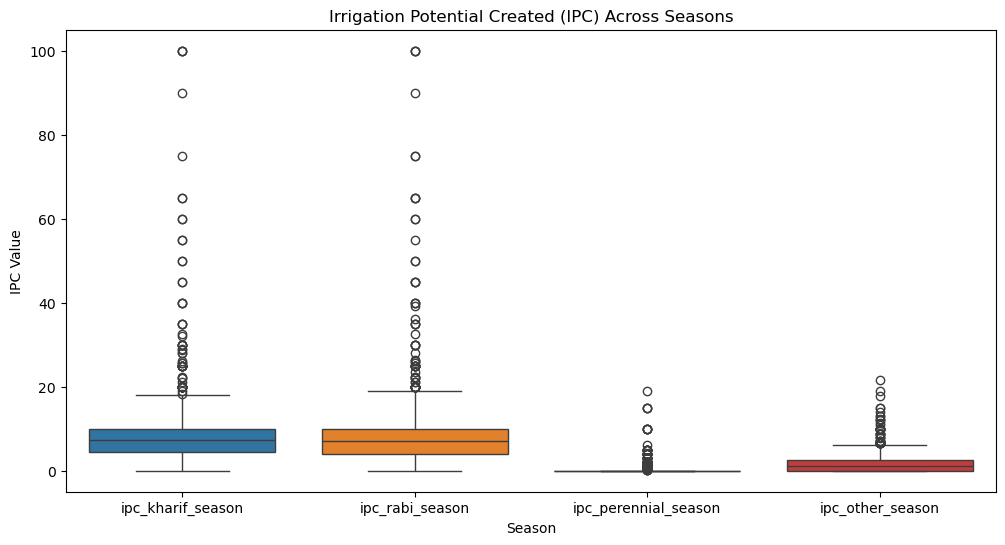

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["ipc_kharif_season", "ipc_rabi_season", "ipc_perennial_season", "ipc_other_season"]])
plt.title("Irrigation Potential Created (IPC) Across Seasons")
plt.xlabel("Season")
plt.ylabel("IPC Value")
plt.show()


# Line Plot: Pump Operating Days Over Seasons

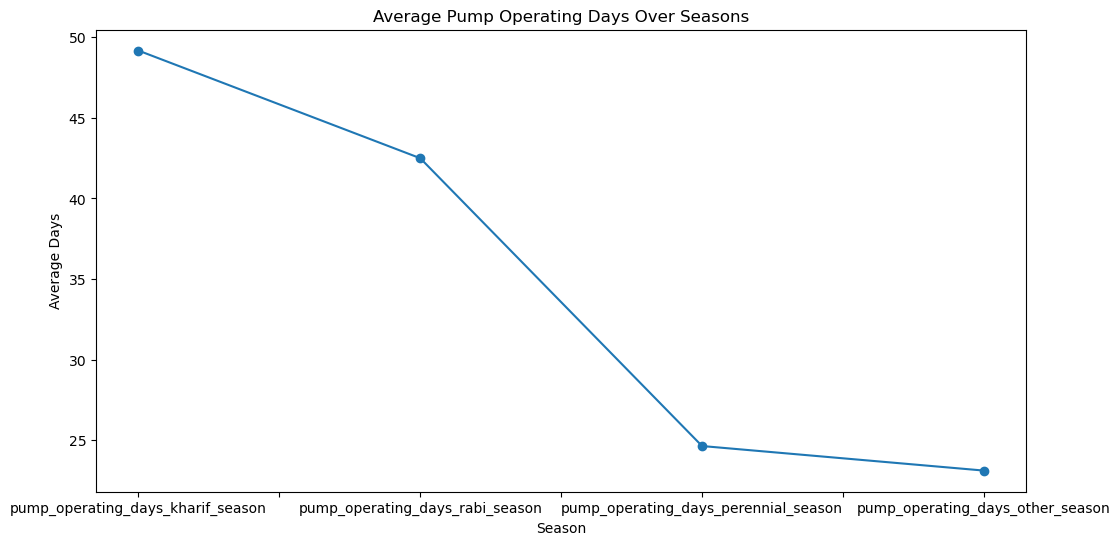

In [13]:
plt.figure(figsize=(12,6))
df[["pump_operating_days_kharif_season", "pump_operating_days_rabi_season", "pump_operating_days_perennial_season", "pump_operating_days_other_season"]].mean().plot(marker="o")
plt.title("Average Pump Operating Days Over Seasons")
plt.xlabel("Season")
plt.ylabel("Average Days")
plt.show()


# Violin Plot: Scheme Construction Cost Distribution

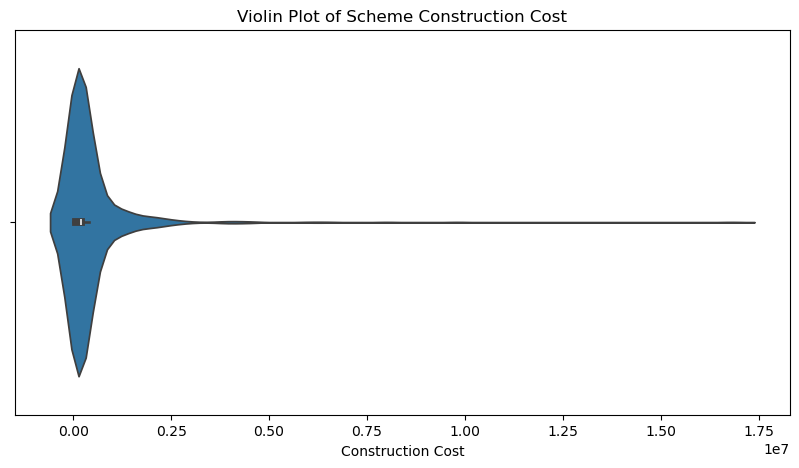

In [15]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df["scheme_construction_cost"].dropna())
plt.title("Violin Plot of Scheme Construction Cost")
plt.xlabel("Construction Cost")
plt.show()



# Swarm Plot: Horsepower vs. Pump Operating Days

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.1% of the points

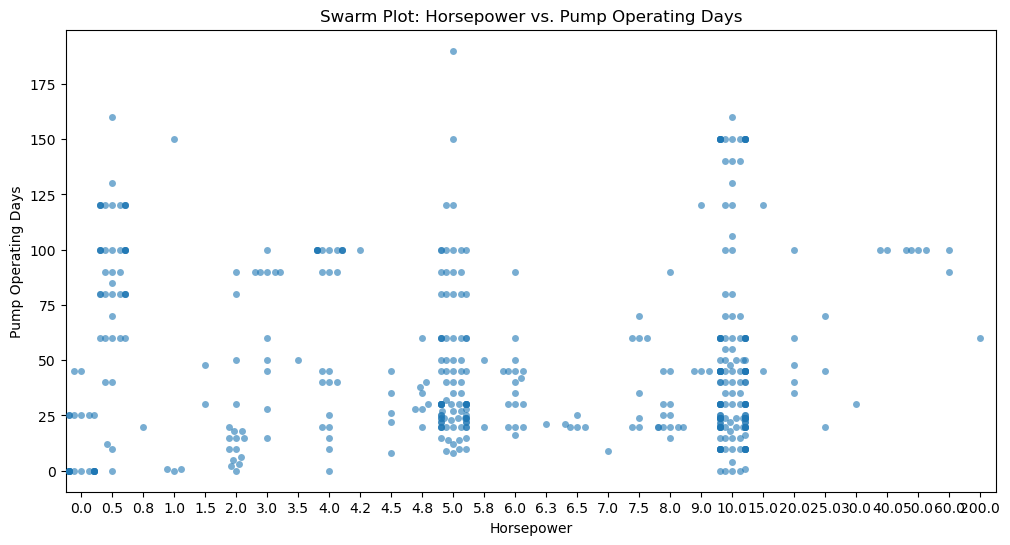

In [16]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x="horse_power_of_lifting_device", y="pump_operating_days_kharif_season", alpha=0.6)
plt.title("Swarm Plot: Horsepower vs. Pump Operating Days")
plt.xlabel("Horsepower")
plt.ylabel("Pump Operating Days")
plt.show()


# KDE Plot: Scheme Machinery Cost Density

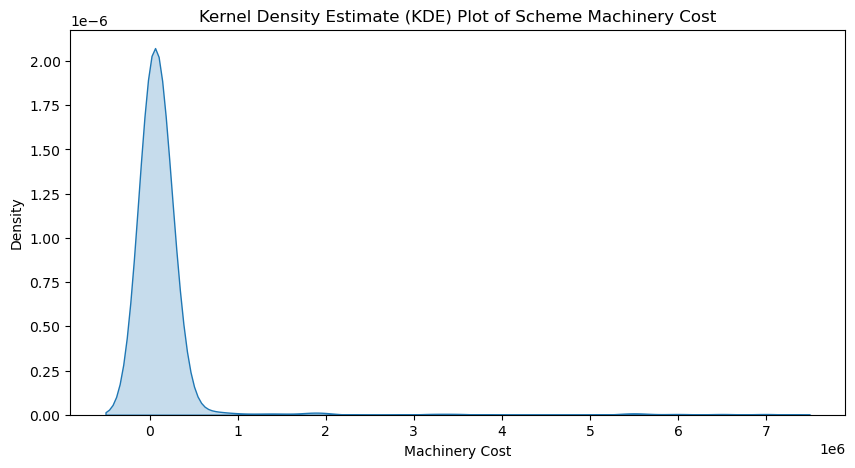

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot(df["scheme_machinery_cost"].dropna(), fill=True)
plt.title("Kernel Density Estimate (KDE) Plot of Scheme Machinery Cost")
plt.xlabel("Machinery Cost")
plt.show()

# Count Plot: Number of Schemes by State

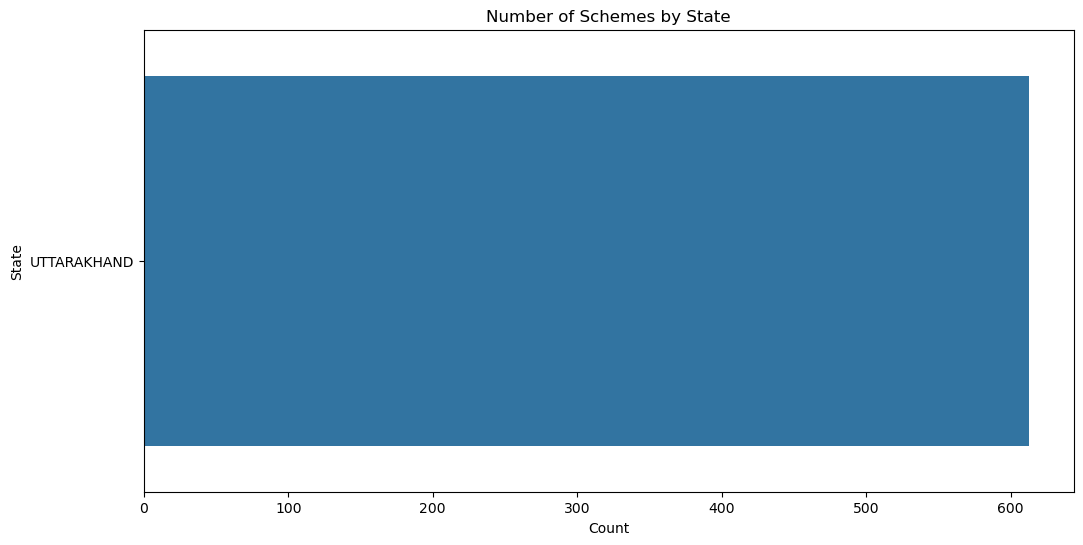

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="state_name", order=df["state_name"].value_counts().index)
plt.title("Number of Schemes by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()

# Jointplot: Scheme Construction Cost vs. Machinery Cost

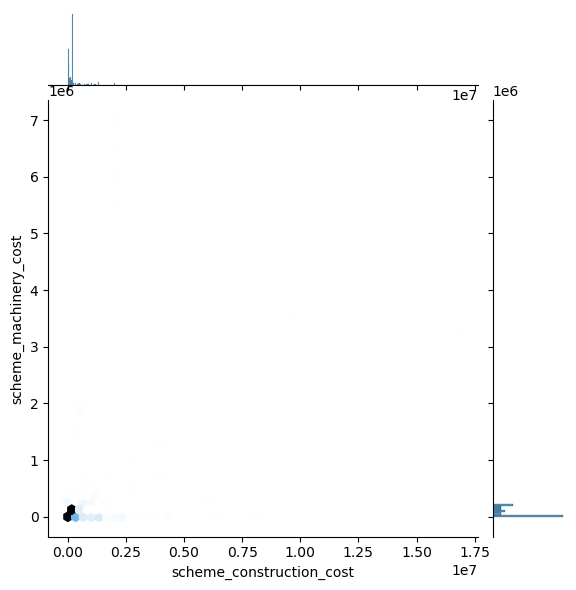

In [19]:
sns.jointplot(data=df, x="scheme_construction_cost", y="scheme_machinery_cost", kind="hex")
plt.show()

# Strip Plot: Scheme Status vs. Construction Cost

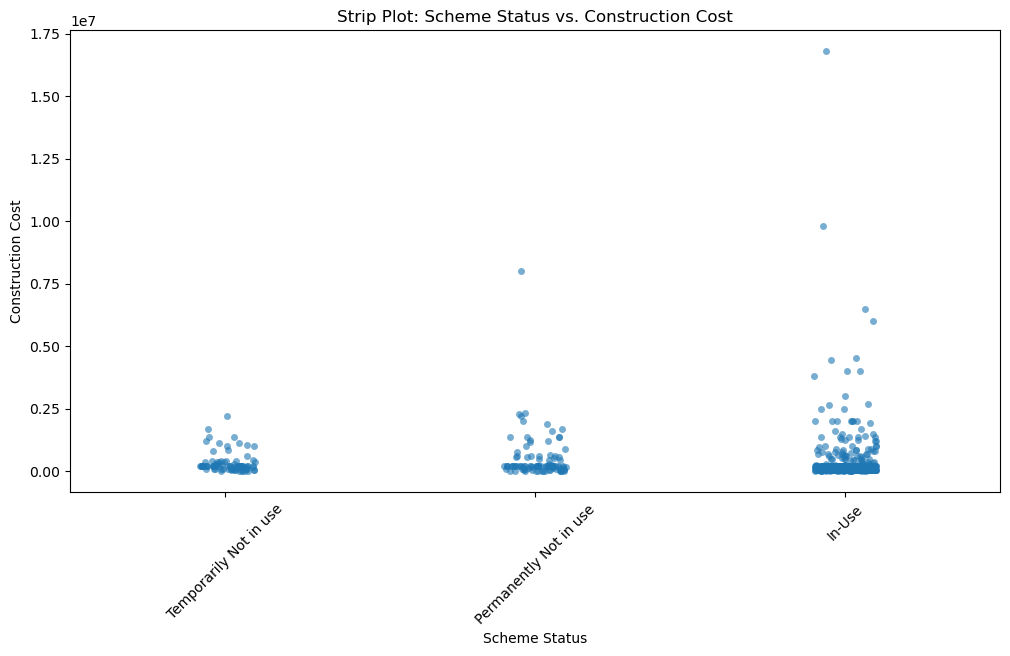

In [20]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df, x="scheme_status_name", y="scheme_construction_cost", jitter=True, alpha=0.6)
plt.title("Strip Plot: Scheme Status vs. Construction Cost")
plt.xlabel("Scheme Status")
plt.ylabel("Construction Cost")
plt.xticks(rotation=45)
plt.show()

# Heatmap: Missing Data

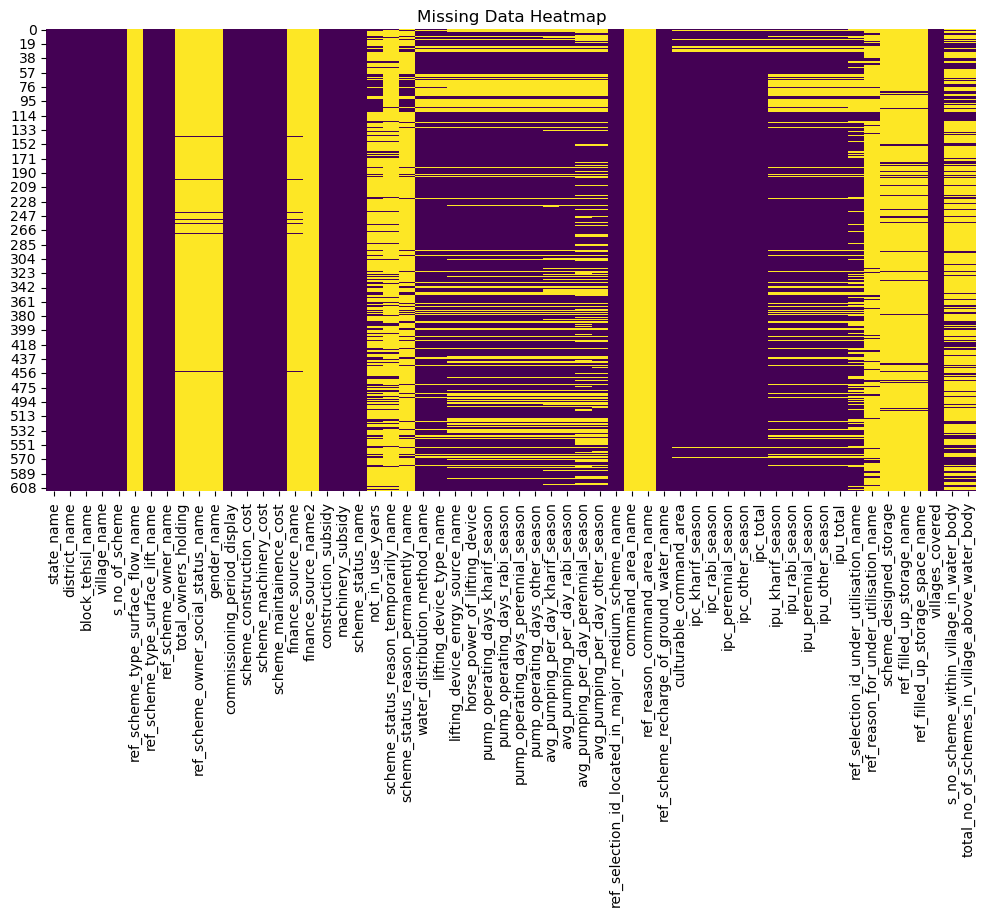

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# Boxen Plot: Pump Operating Days in Different Seasons

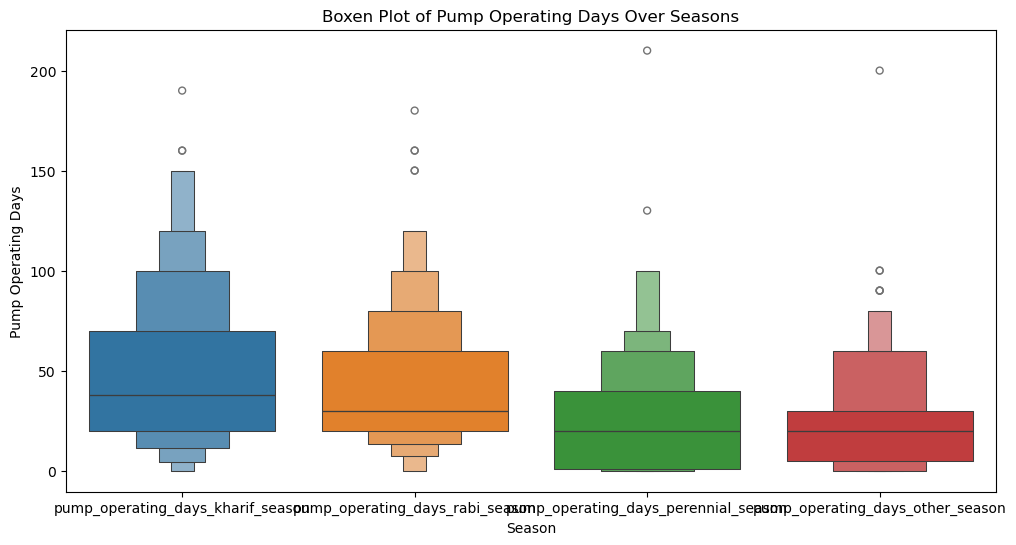

In [22]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df[["pump_operating_days_kharif_season", "pump_operating_days_rabi_season", "pump_operating_days_perennial_season", "pump_operating_days_other_season"]])
plt.title("Boxen Plot of Pump Operating Days Over Seasons")
plt.xlabel("Season")
plt.ylabel("Pump Operating Days")
plt.show()


# Hexbin Plot: Construction Cost vs. Machinery Cost

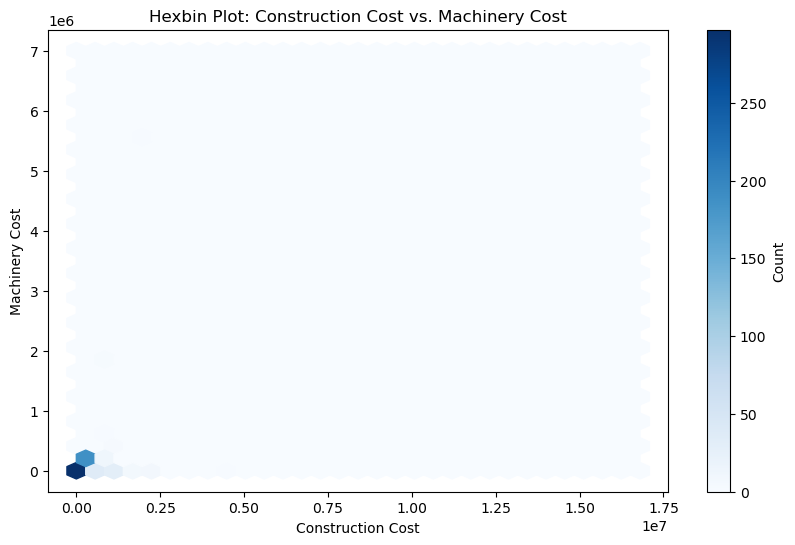

In [23]:
plt.figure(figsize=(10,6))
plt.hexbin(df["scheme_construction_cost"].dropna(), df["scheme_machinery_cost"].dropna(), gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel("Construction Cost")
plt.ylabel("Machinery Cost")
plt.title("Hexbin Plot: Construction Cost vs. Machinery Cost")
plt.show()


Observation on the Dataset:

UKSWLift data give information regarding irrigation schemes such as their nature, ownership, cost, and seasonal operation. It points out that the majority of schemes belong to surface lift irrigation, while government and panchayat ownership is widespread. Although the financial information of subsidies and maintenance expenditure is recorded, most schemes do not contain information on source of funds. A number of schemes are out of order, with some non-functional for many years. Seasonal use is diverse, with most active during the Rabi and Kharif seasons. Absence of data on financial aid, storage, and underuse constrains detailed analysis. On a general basis, the data captures irrigation challenges and regional disparities in water resource management.